A probability distribution is a compact description of a probability space $\langle \Omega, \mathcal{F}, \mathbb{P} \rangle$ in conjunction with a random variable whose domain is $\Omega$ (relative to $\mathcal{F}$).

# Discrete probability distributions

In the case of a discrete random variable $X$ (e.g. our vowel phoneme and string-length examples), we can fully describe its probability distribution using a [probability mass function](https://en.wikipedia.org/wiki/Probability_mass_function) (PMF) $p_X: \text{cod}(X) \rightarrow \mathbb{R}_+$. This function is defined directly in terms of the random variable and the probability function $\mathbb{P}$:

$$p_X(x) \equiv \mathbb{P}(\{\omega \in \Omega \mid X(\omega) = x\})$$

These definitions are related to a notation that you might be familiar with: $\mathbb{P}(X = x) \equiv p_X(x)$. This notation is often extended to other relations $\mathbb{P}(X \in E) = \mathbb{P}(\{\omega \in \Omega \mid \omega \in X^{-1}(E)\})$ or $\mathbb{P}(X \leq x) \equiv \mathbb{P}(\{\omega: X(\omega) \leq x\})$.

The latter of these is often used in defining the [cumulative distribution function](https://en.wikipedia.org/wiki/Cumulative_distribution_function) (CDF) $F_X: \text{cod}(X) \rightarrow \mathbb{R}_+$:

$$F_X(x) = \mathbb{P}(X \leq x) = \sum_{y \in X(\Omega):y<x} p_X(y)$$

The PMF (and by extension the CDF) is *parameterized* in terms of the information necessary to define their outputs for all possible inputs $x \in X(\Omega)$. This parameterization allows us to talk about *families of distributions*, which all share a functional form (modulo the values of the parameters). We'll see a few examples of this below.  

In `scipy`, discrete distributions are implemented using [`scipy.rv_discrete`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_discrete.html), either by direct instantiation or subclassing.

In [ ]:
from scipy.stats import rv_discrete

## Finite distributions

When there are a finite number of values that the random variables can take, as in the example of $V$ above, the probability of each possibility can simply be listed. One such distribution—or really family of distributions—that we will make extensive use of—indeed, the distribution that our vowel random variable $V$ from above has—is the [categorical distribution](https://en.wikipedia.org/wiki/Categorical_distribution). (It is common to talk about *the* categorical distribution, when we really mean *the family of* categorical distributions.)  This distribution is parameterized by a list of probabilities $\boldsymbol\theta$, where $\theta_i$ gives $p_V(i) = \mathbb{P}(V = i) = \mathbb{P}(\{\omega \in \Omega \mid V(\omega) = i\}) = \theta_i$ and $\sum_{i \in V(\Omega)} \theta_i$.

In [ ]:
import numpy as np

# this theta is totally made up
idx = np.arange(11)
theta = (0.05, 0.1, 0.1, 0.05, 0.05, 0.25, 0.15, 0.1, 0.075, 0.025, 0.05)
categorical = rv_discrete(name='categorical', values=(idx, theta))

The PMF is implemented as an instance method `rv_discrete.pmf` on this distribution.

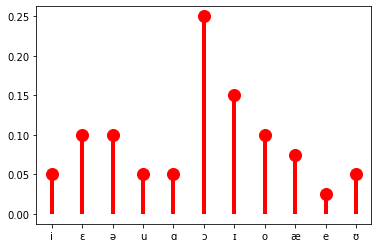

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
ax.plot(list(vowels), categorical.pmf(idx), 'ro', ms=12, mec='r')
ax.vlines(list(vowels), 0, categorical.pmf(idx), colors='r', lw=4)
plt.show()

The [Bernoulli distribution](https://en.wikipedia.org/wiki/Bernoulli_distribution), which we will also make extensive use of, is a special case of the categorical distribution where $|X(\Omega)| = 2$. By convention, $X(\Omega) = \{0, 1\}$ In this case, we need to specify the probability $\pi$ for only one value of $X$, since the probability of the other must be $1- \pi$. Indeed, more generally, we need to specify only $|X(\Omega)| - 1$ values for a random variable $X$ that is distributed categorical.

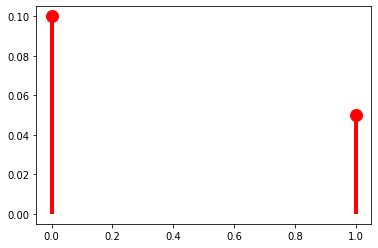

In [ ]:
from scipy.stats import bernoulli

bern = bernoulli(0.25)

# annoyingly, `bernoulli.pmf` seems to be implemented
# to treat `p` as as the probability of 0
fig, ax = plt.subplots(1, 1)
ax.plot([1, 0], categorical.pmf([0, 1]), 'ro', ms=12, mec='r')
ax.vlines([1, 0], 0, categorical.pmf([0, 1]), colors='r', lw=4)
plt.show()


I'll follow the convention of denoting the PMF of a particular kind of distribution using (usually shortened versions of) the distribution's name, with the parameters following a semicolon. (The semicolon notation wil become important as we move through Module 1.)

$$\text{Cat}(x; \boldsymbol\theta) = p_X(x) = \mathbb{P}(X = x) = \mathbb{P}(\{\omega \in \Omega \mid X(\omega) = x\}) = \theta_x$$

To express the above equivalences, I'll often write:

$$X \sim \text{Cat}(\boldsymbol{\theta})$$

This statement is read "$X$ is distributed categorical with parameters $\boldsymbol{\theta}$."

So then the Bernoulli distribution would just be:

$$\text{Bern}(x; \pi) = \begin{cases}\pi & \text{if } x = 1\\1 - \pi & \text{if } x = 0\end{cases}$$

And if a random variable $X$ is distributed Bernoulli with parameter $\pi$, we would write:

$$X \sim \text{Bern}(\pi)$$

It's sometimes useful to write the PMF for the categorical and Bernoulli distributions as:

$$\text{Cat}(x; \boldsymbol\theta) = \prod_{i \in V(\Omega)} \theta_i^{1_{\{x\}}[i]}$$

$$\text{Bern}(x; \pi) = \pi^{x}(1-\pi)^{1-x}$$

where

$$1_A[x] = \begin{cases}1 & \text{if } x \in A\\ 0 & \text{otherwise}\\ \end{cases}$$

In an abuse of notation, I will sometimes write:

$$\text{Cat}(x; \boldsymbol\theta) = \prod_{i \in V(\Omega)} \theta_i^{1_{x}[i]}$$

Categorical and Bernoulli distributions won't be the only finite distributions we work with, but they will be the most common.

## Countably infinite distributions

When there are a countably infinite number of values that a random variable can take, as in the example of string length $L$ above, the probability of each possibility cannot simply be listed: we need some way of computing it for any value.

However we compute these values, they must sum to one as required by the assumption of unit measure: $\mathbb{P}(\Omega) = 1$. Since $\mathbb{P}(\Omega) = \sum_{x \in X(\Omega)} p_X(x)$, another way of stating this requirement is to say that the series $\sum_{x \in X(\Omega)} p_X(x)$ must converge to 1.

One example of such a series is a geometric series, such as $\sum_{k=1}^\infty \frac{1}{2^k} = \frac{1}{2} + \frac{1}{4} + \frac{1}{8} + \ldots = 1$. This series gives us our first example of a probability distribution with *infinite support*–i.e. one that assigns a non-zero probability to an infinite (but countable) number of values of a random variable. So for instance, if we are considering our random variable $L$ mapping strings to their lengths, $p_X(k) = \frac{1}{2^k}$ is a possible PMF for $L$. (This assumes that strings cannot have zero length, meaning that $\Omega = \Sigma^+$ rather than $\Sigma^*$; if we want to allow zero-length strings $\epsilon$, we would need $p_X(k) = \frac{1}{2^{k+1}}$.)

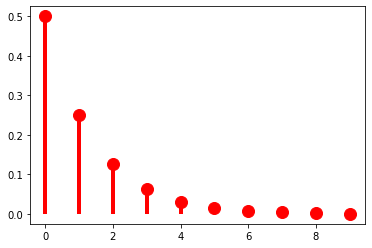

In [ ]:
class parameterless_geometric_gen(rv_discrete):
    "A special case of the geometric distribution without parameters"
    def _pmf(self, k):
        return 2.0 ** -(k+1)

parameterless_geometric = parameterless_geometric_gen(name="parameterless_geometric")

k = np.arange(10)

fig, ax = plt.subplots(1, 1)
ax.plot(k, parameterless_geometric.pmf(k), 'ro', ms=12, mec='r')
ax.vlines(k, 0, parameterless_geometric.pmf(k), colors='r', lw=4)
plt.show()

As it stands, this distribution has no parameters, meaning that we have no control over how quickly the probabilities drop off. The geometric distribution provides us this control using a parameter to $\pi \in (0, 1]$:

$$\text{Geom}(x; \pi) = (1-\pi)^k\pi$$

When $\pi = \frac{1}{2}$, we get exactly the distribution above.

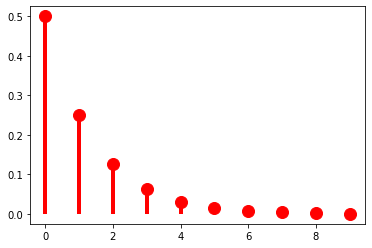

In [ ]:
from scipy.stats import geom

p = 0.5

fig, ax = plt.subplots(1, 1)
ax.plot(k, geom(p).pmf(k+1), 'ro', ms=12, mec='r')
ax.vlines(k, 0, geom(p).pmf(k+1), colors='r', lw=4)
plt.show()

As $\pi \rightarrow 0$, the distribution flattens out (or becomes *denser*).

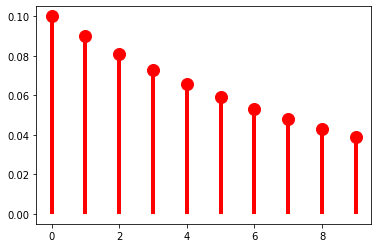

In [ ]:
p = 0.1

fig, ax = plt.subplots(1, 1)
ax.plot(k, geom(p).pmf(k+1), 'ro', ms=12, mec='r')
ax.vlines(k, 0, geom(p).pmf(k+1), colors='r', lw=4)
plt.show()

And as $\pi \rightarrow 1$, it becomes sharper (or *sparser*).

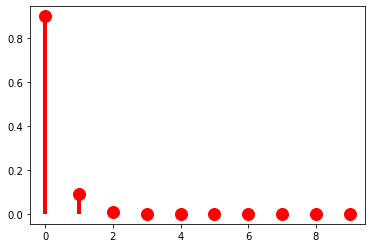

In [ ]:
p = 0.9

fig, ax = plt.subplots(1, 1)
ax.plot(k, geom(p).pmf(k+1), 'ro', ms=12, mec='r')
ax.vlines(k, 0, geom(p).pmf(k+1), colors='r', lw=4)
plt.show()

At this point, it's useful to pause for a moment to think about what exactly a parameter like $\pi$ is. I said above that random variables and probability distributions together provide a way of classifying probability spaces: in saying that $p_X(k) = (1-\pi)^k\pi$ we are *describing* $\mathbb{P}: \mathcal{F} \rightarrow \mathbb{R}_+$ by using $X$ to abstract across whatever the underlying measurable space $\langle \Omega, \mathcal{F} \rangle$ is. The distribution gives you the form of that description; the parameter $\pi$ gives the content of the description. Because the use of $X$ is always implied, unless it really matters, I'm going to start dropping $X$ from $p_X$ unless I'm emphasizing the random variable in some way.

The $\pi$ parameter of a geometric distribution allows us to describe distributions that have a very particular shape–namely, ones where $\forall k \in \mathbb{N}: p(k) > p(k + 1)$. But this isn't always a good way of describing a particular distribution. For instance, for our string-length variable $L$, it's probably a pretty bad description regardless of what particular distribution on string lengths (type or token) we're describing because 1 grapheme/phoneme words just aren't more frequent than two grapheme/phoneme words. This point can be seen if we look at the distribution of word lengths at the type level in the [CMU Pronouncing Dictionary](http://www.speech.cs.cmu.edu/cgi-bin/cmudict), which contains phonemic transcriptions of English words and which we'll use extensively in Module 2.

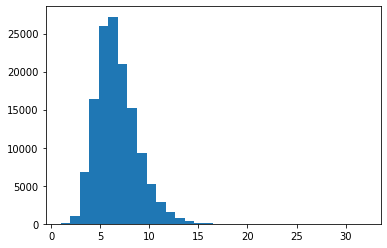

In [ ]:
from urllib.request import urlopen

cmudict_url = "http://svn.code.sf.net/p/cmusphinx/code/trunk/cmudict/cmudict-0.7b"

with urlopen(cmudict_url) as cmudict:
  words = [
      line.split()[1:] for line in cmudict if line[0] != 59
  ]

_ = plt.hist([len(w) for w in words], bins=32)

One such distribution that give us more flexibility in this respect is the [negative binomial distribution](https://en.wikipedia.org/wiki/Negative_binomial_distribution), which is a very useful for [modeling token frequency in text](https://doi.org/10.1017/S1351324900000139). This distribution effectively generalizes the geometric by allowing us to control the exponent on $\pi$ with a new parameter $r$.

$$\text{NegBin}(k; \pi, r) = {k+r-1 \choose r-1}(1-\pi)^{k}\pi^{r}$$

This added flexibility in turn requires us to add an additional term ${k+r-1 \choose r-1} = \frac{(k+r-1)!}{(r-1)!\,(k)!}$ that ensures that the series $\sum_{k=0}^\infty \text{NegBin}(k; \pi, r)$ converges to $1$. The pieces of this term that do not include the value we're computing the probability of–i.e. $\frac{1}{(r-1)!}$–are often called the *normalizing constant*. We will make extensive use of this concept as the course moves forward.

When $r = 1$, we of course just get the geometric distribution. As such, if we keep $r = 1$, manipulating $\pi$ will have the same effect we saw above.

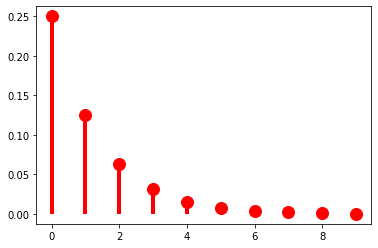

In [ ]:
from scipy.stats import nbinom

p = 0.5
r = 1

fig, ax = plt.subplots(1, 1)
ax.plot(k, nbinom(r, p).pmf(k+1), 'ro', ms=12, mec='r')
ax.vlines(k, 0, nbinom(r, p).pmf(k+1), colors='r', lw=4)
plt.show()

As $r$ grows, though, we get very different behavior: $p(k)$ is no longer always greater than $p(k + 1)$. Another way of saying this is that we can use $r$ to shift the probability mass rightward.

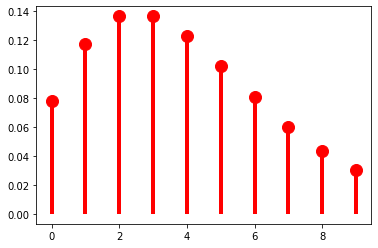

In [ ]:
p = 0.5
r = 5

fig, ax = plt.subplots(1, 1)
ax.plot(k, nbinom(r, p).pmf(k+1), 'ro', ms=12, mec='r')
ax.vlines(k, 0, nbinom(r, p).pmf(k+1), colors='r', lw=4)
plt.show()

The mass-shifting effect is modulated by $\pi$: it accelerates with small $\pi$...

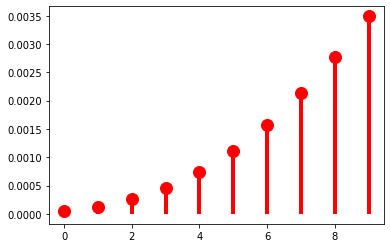

In [ ]:
p = 0.1
r = 5

fig, ax = plt.subplots(1, 1)
ax.plot(k, nbinom(r, p).pmf(k+1), 'ro', ms=12, mec='r')
ax.vlines(k, 0, nbinom(r, p).pmf(k+1), colors='r', lw=4)
plt.show()

...but decelerates with large $\pi$.

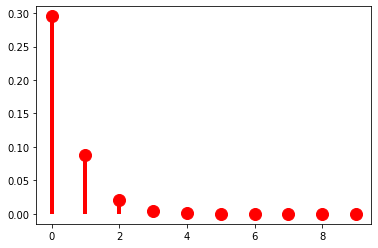

In [ ]:
p = 0.9
r = 5

fig, ax = plt.subplots(1, 1)
ax.plot(k, nbinom(r, p).pmf(k+1), 'ro', ms=12, mec='r')
ax.vlines(k, 0, nbinom(r, p).pmf(k+1), colors='r', lw=4)
plt.show()

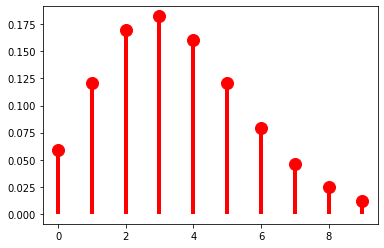

In [ ]:
p = 0.9
r = 40

fig, ax = plt.subplots(1, 1)
ax.plot(k, nbinom(r, p).pmf(k+1), 'ro', ms=12, mec='r')
ax.vlines(k, 0, nbinom(r, p).pmf(k+1), colors='r', lw=4)
plt.show()

We won't talk about how to fit a distribution to some data until later, when we talk about parameter estimation; but the negative binomial distribution can provide a reasonably good description of the [empirical distribution](https://en.wikipedia.org/wiki/Empirical_distribution_function) of word lengths. One way to visualize this is to compare the empirical CDF with the CDF of the best fitting negative binomial.

Optimization terminated successfully.
         Current function value: 2.180477
         Iterations: 22
         Function evaluations: 24
         Gradient evaluations: 24


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


p = 0.37, r = 3.71


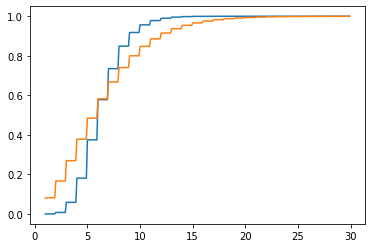

In [ ]:
from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.discrete.discrete_model import NegativeBinomial

ecdf = ECDF([len(w) for w in words])
negbin_fit = NegativeBinomial([len(w) for w in words], np.ones(len(words))).fit()

p = 1/np.exp(1+negbin_fit.params[0]*negbin_fit.params[1])
r = np.exp(negbin_fit.params[0])*p/(1-p)

print(f"p = {np.round(p, 2)}, r = {np.round(r, 2)}")

k = np.arange(30)

fig, ax = plt.subplots(1, 1)
plt.plot(np.mgrid[1:30:0.1], ecdf(np.mgrid[1:30:0.1]))
plt.plot(np.mgrid[1:30:0.1], nbinom(r, p).cdf(np.mgrid[1:30:0.1]))
plt.show()

A [limiting case](https://en.wikipedia.org/wiki/Negative_binomial_distribution#Poisson_distribution) of the negative binomial distribution that you may be familiar with is the [Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution).

$$\text{Pois}(k; \lambda) = \frac{\lambda^k\exp(-\lambda)}{k!}$$

The Poisson distribution arises as $\text{Pois}(k; \lambda) = \lim_{r \rightarrow \infty} \text{NegBin}
\left(k; r, \frac{\lambda}{r + \lambda}\right)$.

# Continuous probability distributions

Once we move to working with random variables that have an uncountable number of values–as in the case of our formant value example above, where $X: \mathbb{R}_+^2 \rightarrow \mathbb{R}^2$ is the identity function–we can no longer assign a non-zero probability to every value that variable takes. The intuition for why this is is that there are just too many numbers (e.g. too many posible formant values); and if we assigned non-zero probability to more than countably many of them, we'd end up with a sum across those numbers that doesn't satisfy the the assumption of $\sigma$-additivity. (You'll need to take my word on this point if you haven't proved it before.)

This fact is why we require the event space for an uncountable sample space to be a Borel 𝜎-algebra. Remember that a Borel 𝜎-algebra for the reals will contain all the intervals we might want but not single real numbers. This assumption about the event space in turn means that we don't need to worry about assigning non-zero probability to uncountably many values: indeed, we will *always* assign exactly zero probability to any particular real. (Well. Most of the time.) To restate this: every possibility in a real-valued sample space has probability zero: $\forall x \in \Omega: \mathbb{P}(x) = 0$. This in turn means that a PMF isn't going to be useful here.

What we work with instead is a [probability density function](https://en.wikipedia.org/wiki/Probability_density_function) (PDF) $f_X: \Omega \rightarrow \mathbb{R}_+$. Note that the PMF, which I will usually denote $p$ or $p_X$, and the PDF, which I will usually denote $f$ or $f_X$, have the same function signature. It is important to note that they provide very different information: where the PMF tells you the probability of a particular possibility, the PDF does not, though it can be used to compute a probability: specifically, the probability of $X$ taking on a value in some set. So it can be used to tell you $\mathbb{P}(X \in A)$:

$$\mathbb{P}(X \in A) = \int_A f_X(x) \, \mathrm{d}x$$

When the codomain of $X$ is a single value (rather than a vector), we call the distribution univariate; otherwise, we call it multivariate. We can express univariate continuous distributions as:

$$\mathbb{P}(a < X < b) = \int_a^b f_X(x) \, \mathrm{d}x$$

This expressions is a special case of the first:

$$\mathbb{P}(a < X < b) = \mathbb{P}(X \in (a, b)) = \int_{(a, b)} f_X(x) \, \mathrm{d}x$$

We can in turn express the cumulative distribution function $F_X$ in a similar way, but without a lower bound:

$$F_X(b) = \mathbb{P}(X < b) = \int_{-\infty}^b f_X(x) \, \mathrm{d}x$$

It can sometimes be useful to express $\mathbb{P}(a < X < b)$ and $\mathbb{P}(X > x)$ in terms of $F_X$:

$$\mathbb{P}(a < X < b) = F_X(b) - F_X(a)$$
$$\mathbb{P}(X > x) = 1 - F_X(x)$$

#### Univariate continuous uniform distribution

The simplest example of a continuous distribution is the univariate uniform distribution, which is parameterized by an infimum $a$ and a supremum $b$ and has a PDF:

$$\mathcal{U}(x; a, b) = \begin{cases}\frac{1}{b - a} & \text{if } x \in [a, b] \\ 0 & \text{otherwise}\end{cases}$$

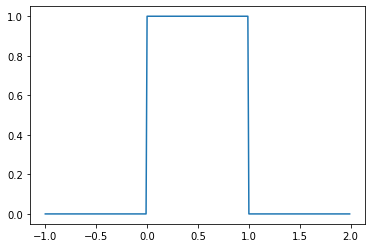

In [ ]:
from scipy.stats import uniform

u = uniform(0, 1)

_ = plt.plot(
    np.mgrid[-1:2:0.01],
    u.pdf(np.mgrid[-1:2:0.01])
)

You'll note that I'm using $\mathcal{U}$–rather than something like $\text{Unif}$–for the name of the PDF. Certain distributions, including the continuous uniform and the normal or gaussian, canonically have such names.

You'll also note that $\mathcal{U}(x; a, b)$ is the PDF, not the PMF. This notational convention is common: for discrete distributions like the negative binomial $\text{NegBin}$ will be used to denote the PMF (or to express that a random variable has a particular distribution), while for continuous distributions like the continuous uniform, $\mathcal{U}$ will be used to denote the PDF (or to express that a random variable has a particular distribution).

Remember that **the PDF does not give you the probability of a value**: the probability of a (continuous) uniformly distributed value $x$ is not $\frac{1}{b - a}$, it is $0$; $\frac{1}{b - a}$ is the value of the density at $x$. This means that:

$$\mathbb{P}(x < X < y) = \int_x^y f_X(z)\,\mathrm{d}z = \frac{\min(y, b) - \max(x, a)}{b - a}$$

where $a = \inf \{x \in X(\Omega) \mid f_X(x) > 0\}$ and $b = \sup \{x \in X(\Omega) \mid f_X(x) > 0\}$. So then, if $a=0$ and $b=1$, $\mathbb{P}(0.25 < X < 0.75) = 0.5$. This can be visualized by filling in the area we're integrating.

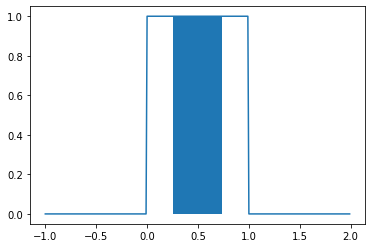

In [ ]:
_ = plt.plot(np.mgrid[-1:2:0.01], u.pdf(np.mgrid[-1:2:0.01]))
_ = plt.fill_between(np.mgrid[0.25:0.75:0.01], u.pdf(np.mgrid[0.25:0.75:0.01]))



Rather than define parameters relative to $X$ every time we want to specify a probability, I'll often write:

$$\mathbb{P}(x < X < y; a, b) = \int_x^y f_X(z)\,\mathrm{d}z = \frac{\min(y, b) - \max(x, a)}{b - a}$$

Or:

$$\mathbb{P}(x < X < y \mid a, b) = \int_x^y f_X(z)\,\mathrm{d}z = \frac{\min(y, b) - \max(x, a)}{b - a}$$

Whether I use the semicolon or pipe will depend on context, as we'll discuss below: it basically comes down to whether I'm assuming that $a$ and $b$ are the values of some underlying random variables–in which case, $\mathbb{P}(x < X < y \mid a, b)$ is really shorthand for something like $\mathbb{P}(x < X < y \mid A=a, B=b)$–or whether they're fixed values given by some oracle.

The CDF $F_X$ for a uniform random variable $X$ is then:

$$F_X(x) = \mathbb{P}(X < x; a, b) = \int_{-\infty}^x f_X(z)\,\mathrm{d}z = \frac{\min(\max(x, a), b) - a}{b - a}$$

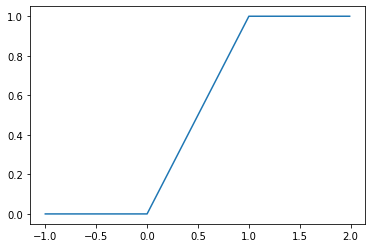

In [ ]:
_ = plt.plot(
    np.mgrid[-1:2:0.01],
    uniform(0, 1).cdf(np.mgrid[-1:2:0.01])
)

## Beta distribution

Like the geometric distribution, the continuous uniform distribution doesn't give us all the control we might want over the shape of the distribution. We can gain that additional control using a Beta distribution.

$$\text{Beta}(x; \alpha, \beta) = \begin{cases}\frac{x^{\alpha-1}(1-x)^{\beta-1}} {\mathrm{B}(\alpha,\beta)} & \text{if } x \in (0, 1)\\0 & \text{otherwise}\end{cases}$$

where $\mathrm{B}(\alpha,\beta) = \frac {\Gamma (\alpha)\Gamma (\beta)}{\Gamma (\alpha+\beta)}$, the normalizing constant, is known as the [beta function](https://en.wikipedia.org/wiki/Beta_function) and $\Gamma$ (the [gamma function](https://en.wikipedia.org/wiki/Gamma_function)) generalizes the factorial function to real numbers: $\Gamma(x+1) = x\Gamma(x) = x!$ for all positive natural numbers; and more generally, for positive really numbers $\Gamma(x) = \int_0^\infty t^{x-1} e^{-t}\,\mathrm{d}t$.

The beta distribution can be thought of as a generalization of the uniform distribution $\mathcal{U}(0, 1)$, since it is equivalent when $\alpha = \beta = 1$.

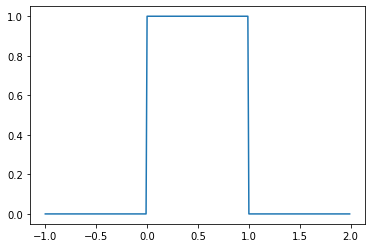

In [ ]:
from scipy.stats import beta

b = beta(1, 1)

_ = plt.plot(
    np.mgrid[-1:2:0.01],
    b.pdf(np.mgrid[-1:2:0.01])
)

Defined this way, the beta distribution has support on (assigns non-zero values) only intervals in $(0, 1)$, but if we ever need support over an arbitrary finite interval $(a, b)$, we can simply add the bounds $a$ and $b$ to the parameterization.

$$\text{Beta}(x; \alpha, \beta, a, b) = \begin{cases}\frac{\left(\frac{x - a}{b - a}\right)^{\alpha-1}\left(1-\frac{x - a}{b - a}\right)^{\beta-1}} {\mathrm{B}(\alpha,\beta)} & \text{if } x \in (a, b)\\0 & \text{otherwise}\end{cases}$$

This definition makes the beta distribution a true generalization of $\mathcal{U}(a, b) = \text{Beta}(1, 1, a, b)$. We'll mainly work with the two-parameter version for the sake of simplicity, and because for most use cases, we actually only need support on $(0, 1)$.

Manipulating the *shape* parameters $\alpha$ and $\beta$ introduces bias toward $0$, $1$, or $\frac{\alpha}{\alpha + \beta}$. When $\alpha = \beta > 1$, we get more and more density closer to $\frac{\alpha}{\alpha + \beta} = 0.5$.

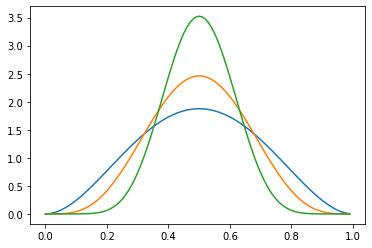

In [ ]:
_ = plt.plot(
    np.mgrid[0:1:0.01],
    beta(3, 3).pdf(np.mgrid[0:1:0.01])
)

_ = plt.plot(
    np.mgrid[0:1:0.01],
    beta(5, 5).pdf(np.mgrid[0:1:0.01])
)

_ = plt.plot(
    np.mgrid[0:1:0.01],
    beta(10, 10).pdf(np.mgrid[0:1:0.01])
)

If we increase $\alpha$ relative to $\beta > 1$, we shift this density to the right.

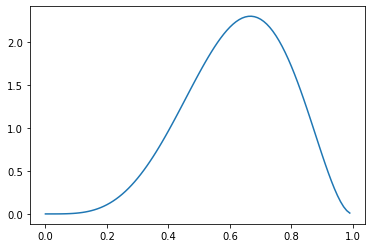

In [ ]:
_ = plt.plot(
    np.mgrid[0:1:0.01],
    beta(5, 3).pdf(np.mgrid[0:1:0.01])
)

And if we increase $\beta$ relative to $\alpha > 1$, we shift the density toward the left.

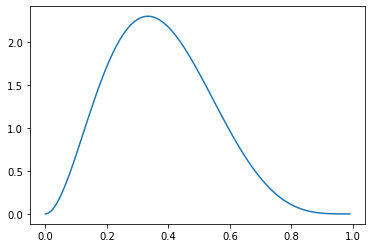

In [ ]:
_ = plt.plot(
    np.mgrid[0:1:0.01],
    beta(3, 5).pdf(np.mgrid[0:1:0.01])
)

In both cases, we have a bias against values nearer to $0$ and $1$ in proportion to how much greater than one the smaller of $\alpha$ and $\beta$ are. We refer to all of these distributions as *dense*.

When either $\alpha > 1 \geq \beta$...

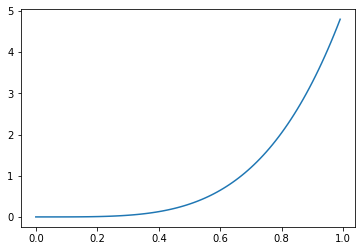

In [ ]:
_ = plt.plot(
    np.mgrid[0:1:0.01],
    beta(5, 1).pdf(np.mgrid[0:1:0.01])
)

...or $\alpha \leq 1 < \beta$, we get bias toward values nearer to $1$ or $0$, respectively.

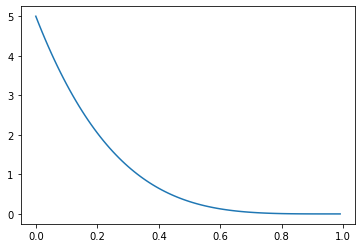

In [ ]:
_ = plt.plot(
    np.mgrid[0:1:0.01],
    beta(1, 5).pdf(np.mgrid[0:1:0.01])
)

And when $\alpha, \beta < 1$, we get a bias toward values near both $0$ and $1$...

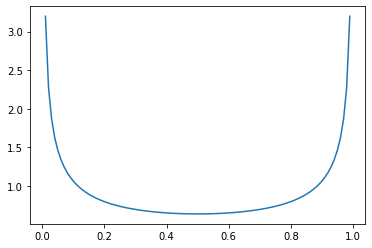

In [ ]:
_ = plt.plot(
    np.mgrid[0:1:0.01],
    beta(0.5, 0.5).pdf(np.mgrid[0:1:0.01])
)

...with more density shifted toward $1$ if $\alpha$ is larger...

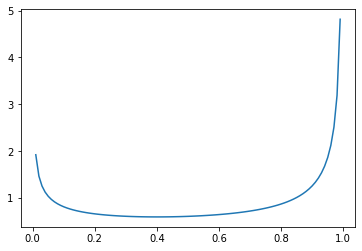

In [ ]:
_ = plt.plot(
    np.mgrid[0:1:0.01],
    beta(0.6, 0.4).pdf(np.mgrid[0:1:0.01])
)

...and more density shifted toward $0$ if $\beta$ is larger.

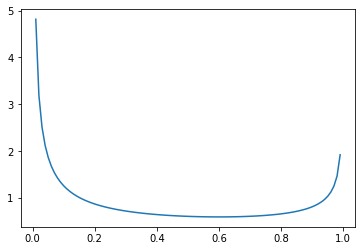

In [ ]:
_ = plt.plot(
    np.mgrid[0:1:0.01],
    beta(0.4, 0.6).pdf(np.mgrid[0:1:0.01])
)

#### Univariate Gaussian distribution

One continuous distribution we will work with extensively in Module 1 is the Gaussian or normal distribution,  which we'll use in modeling the distribution of vowels' formant values. Unlike the continuous uniform and beta distributions,

$$\mathcal{N}(x; \mu, \sigma^2) = \frac{1}{\sigma\sqrt{2\pi}}\exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)$$

where $\mu$ is referred to as the *mean* and $\sigma^2$ as the *variance*.

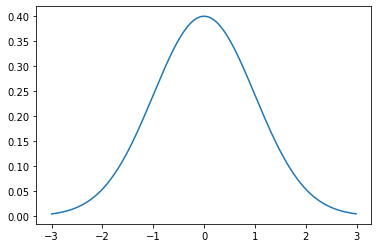

In [ ]:
from scipy.stats import norm

n = norm(0, 1)

_ = plt.plot(np.mgrid[-3:3:0.01], n.pdf(np.mgrid[-3:3:0.01]))

The mean controls the position and the variance controls the width–specifically, the wideness.



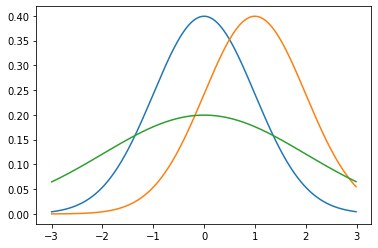

In [ ]:
# mu = 0, sigma^2 = 1
_ = plt.plot(
    np.mgrid[-3:3:0.01],
    norm(0, 1).pdf(np.mgrid[-3:3:0.01])
)

# mu = 1, sigma^2 = 1
_ = plt.plot(
    np.mgrid[-3:3:0.01],
    norm(1, 1).pdf(np.mgrid[-3:3:0.01])
)

# mu = 0, sigma^2 = 2
_ = plt.plot(
    np.mgrid[-3:3:0.01],
    norm(0, 2).pdf(np.mgrid[-3:3:0.01])
)



We say that the distribution is standard normal if the mean $\mu = 0$ and the variance $\sigma^2 = 1$.

As with all continuous distributions, we can compute the cumulative distribution function as:

$$\Phi(x) = \int_{-\infty}^x \mathcal{N}(y; \mu, \sigma^2)\,\mathrm{d}y$$

where $\Phi$ is a common notation for $F_X$, when $X$ is a Gaussian random variable.

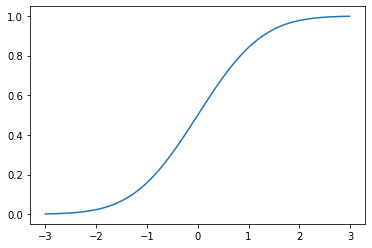

In [ ]:
_ = plt.plot(np.mgrid[-3:3:0.01], norm(0, 1).cdf(np.mgrid[-3:3:0.01]))

$\Phi$ is often referred to as *sigmoidal* or a *sigmoid* for its S shape. These sorts of functions will be very important moving forward–most proximally because they play an important role in models of human perception.

The Gaussian CDF is only one of many continuous CDFs with this shape. The beta CDF is also sigmoidal when $\alpha, \beta \neq 1$.

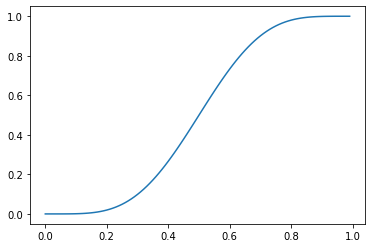

In [ ]:
_ = plt.plot(np.mgrid[0:1:0.01], beta(5, 5).cdf(np.mgrid[0:1:0.01]))

#### Multivariate normal distribution

Perhaps unsurprisingly, a multivariate normal is a generalization of the univariate normal to real-valued vectors $\mathbf{x} \in \mathbb{R}^k$. It's probability density function is:

$$\mathcal{N}(\mathbf{x}; \boldsymbol\mu, \boldsymbol\Sigma) = \frac{1}{\sqrt{(2\pi)^k |\boldsymbol\Sigma|}}\exp\left(-\frac{1}{2} ({\mathbf x}-{\boldsymbol\mu})^\top{\boldsymbol\Sigma}^{-1}({\mathbf x}-{\boldsymbol\mu})\right)$$

where the mean $\boldsymbol\mu \in \mathbb{R}^k$ and the *covariance* $\boldsymbol\Sigma \in \mathbb{R}^{k \times k}$

We're going to spend a lot of time with multivariate normals when we turn to modeling phoneme perception and learning in Module 1, so I'll defer discussion of them until then.